<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__NLP__M17_CaseStudy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study
Epinions.com is a website where people can post reviews of products and services. It covers a wide variety of topics. For this case study, we downloaded a set of 600 posts about digital cameras and carsand saved as “Eopinions.csv”.



 The dataset has 2 columns: ‘class’ and ‘text’

 Theseare the tasks which you have to perform:
 - Read the file as a pandas data-frame.
 - Perform Label Encoding on ‘class’ column.
 - Plot a bar graph to compare the frequencies of both the classes.- Preprocess the ‘text’ column
 - Vectorize the text using CountVectorizer
 - Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the original data. These are your Train and Test Data. Make sure train and test data are having same proportion of data points as the original data
 - Train your machine learning algorithm for classification and prepare a model(you can choose any appropriate algorithm of your choice)
 - Now test the model on the Test data and evaluate the Performance by providing Confusion Matrix for your model
 - Plot ROC Curve.

# Summary - Epinions.com
0. Load the dataset
1. Import libraries
2. Read the dataset
3. Data Preprocessing on X_data[Countvectorizer] and Y_data[label encoding]
4. Split the dataset into X_data and Y_data
* ---------------------- General Add on -----------------------------
5. Split the data into training and testing - 80% training and 20% testing
6. Use only 80% training data to train the model[MultinominalNB]
7. Hyperparameter tunning
8. pass the test to the trained model to predict y_pred_test - validation metrics

#  About The Dataset & Model

- The dataset offers some great opportunities for review analysis and other text related predictive models.

- The model still won't be able to experience  the product, but theoretically it could identify the product  based on a description.

- The goal is to create a model that can identify the variety of the product  based on a review description.

- In this model  - model will  predict product  variety based on description.

# 1.Import libraries

In [53]:
#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Pre-Processing
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Label Encoding
from sklearn.preprocessing import LabelEncoder
#model training
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2.Read the dataset

In [54]:
df = pd.read_csv('/content/drive/MyDrive/Colab Work/Edureka AI Certification/Dataset/Edureka - M17 - Case Study 1+2 - Eop + Hou + Mar + Res/Eopinions.csv')
df.head(3)

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   600 non-null    object
 1   text    600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [56]:
#len(df.class.value_counts())
#df.class.value_counts().values
df['class'].value_counts()

class
Camera    350
Auto      250
Name: count, dtype: int64

>Findings
- There are 600 entries and 350 - Camera and 250- Auto Review product review.

<Axes: xlabel='count', ylabel='class'>

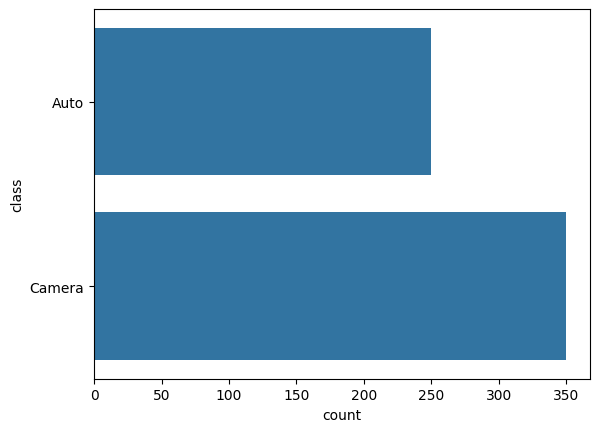

In [57]:
sns.countplot(df['class'])

# 3.Data Preprocessing on X_data and Y_data and 4. Split the dataset into X_data and Y_data
Reduce the model complexity such a way accuracy should improve withoutoverfitting or underfitting.

### Refined-Description

In [58]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

def remove_stop_words(text):
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    stop_words_text = [word for word in words if word.lower() in stop_words]
    return  ' '.join(filtered_words) ,  stop_words_text

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def refine(text):
    tokens = tokenize(text)
    filtered_words, stop_words_text = remove_stop_words(text)
    lemmatized_words = lemmatize(filtered_words)
    return lemmatized_words

for i in range (len(df)):
  df['text'][i] = refine(df['text'][i])


In [59]:
df.head(2)

,class,text
0,Auto,recently purchased J30T moderate mile shopped ...
1,Camera,bought product need instant gratification stan...


### Count Vectorization

In [60]:
##  stopwords and word should repeat minimum 2 times
cv_nostop_min2_max= CountVectorizer(ngram_range =(1,1),
                #stop_words ="english",  ##stopwords considered as english
                #max_df =0.98, #remove a word which repeated 98% in the documents
                min_df =2, # remove a word which  repeated atleast 2 times
              max_features =None )
X_nostop_min2_max= cv_nostop_min2_max.fit_transform(df['text'])
X_nostop_min2_max.shape
#X_nostop_min2_max.toarray()

(600, 6311)

In [61]:
df_count = pd.DataFrame(X_nostop_min2_max.toarray(),columns=cv_nostop_min2_max.get_feature_names_out())
df_count.head()

,00,000,01,02,03,048,08,0l,10,100,...,zeiss,zero,zing,zip,zippy,zone,zoom,zoombrowser,zoomed,zooming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0


### Label Encoding

In [62]:

le=LabelEncoder()
y_data=le.fit_transform(df['class'])
y_data

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,

# 5.Split the data into training and testing and 6. Use only training data to train the model

In [63]:
# training on Count Vectorization
X_train,X_test,y_train,y_test=train_test_split(X_nostop_min2_max,
                                         y_data,test_size=0.2,
                                         random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_test=mnb.predict(X_test)
y_pred_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

# 8.pass the test to the trained model to predict y_pred_test - validation metrics

In [64]:
def model_accuracy(y_test,y_pred_test):
  cm= confusion_matrix(y_test,y_pred_test)
  accuracy = accuracy_score(y_test,y_pred_test)
  #print(cm)
  print(accuracy)

In [65]:
model_accuracy(y_test,y_pred_test)

1.0


In [66]:
def model_accuracy(y_true, y_pred):

 # Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  print("Confusion Matrix:")
  print(cm)

 # Confusion Matrix
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  accuracy = accuracy_score(y_true, y_pred)
  misclassification_rate = 1 - accuracy
  true_positive_rate = tp / (tp + fn)
  false_positive_rate = fp / (fp + tn)
  specificity = tn / (tn + fp)
  precision = tp / (tp + fp)
  null_error_rate = max(y_true.mean(), 1 - y_true.mean())

  print("\nMetrics:")
  print("Accuracy:", accuracy)
  print("Misclassification Rate:", misclassification_rate)
  print("True Positive Rate:", true_positive_rate)
  print("False Positive Rate:", false_positive_rate)
  print("Specificity:", specificity)
  print("Precision:", precision)
  print("Null Error Rate:", null_error_rate)
  print("\n")

  # ROC Curve
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()


Confusion Matrix:
[[46  0]
 [ 0 74]]

Metrics:
Accuracy: 1.0
Misclassification Rate: 0.0
True Positive Rate: 1.0
False Positive Rate: 0.0
Specificity: 1.0
Precision: 1.0
Null Error Rate: 0.6166666666666667




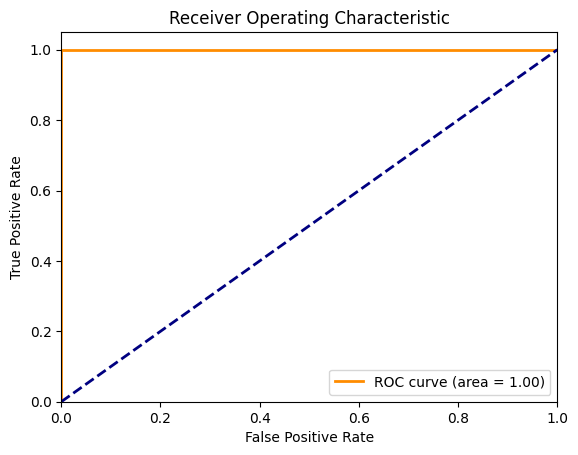

In [67]:
model_accuracy (y_test,y_pred_test)